# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib.error
from urllib.error import HTTPError

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [83]:
# create lists to store city weather information

city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []



In [84]:
url = "http://api.openweathermap.org/data/2.5/weather?"

count = 1

#for city in cities:
for city in cities: 
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_request = requests.get(query_url)
    print(f"Processing request {count} in Set 1 | {city}")
    
    try:
        weather_request.raise_for_status()
        weather_data = weather_request.json()
        city_name.append(weather_data['name'])
        max_temp.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        
    except requests.HTTPError:
        print("City not found. Skipping...")
    count +=1



Processing request 1 in Set 1 | taolanaro
City not found. Skipping...
Processing request 2 in Set 1 | saleaula
City not found. Skipping...
Processing request 3 in Set 1 | pershotravneve
Processing request 4 in Set 1 | vaini
Processing request 5 in Set 1 | cascais
Processing request 6 in Set 1 | sicuani
Processing request 7 in Set 1 | cape town
Processing request 8 in Set 1 | padang
Processing request 9 in Set 1 | chokurdakh
Processing request 10 in Set 1 | bluff
Processing request 11 in Set 1 | atuona
Processing request 12 in Set 1 | hermanus
Processing request 13 in Set 1 | portland
Processing request 14 in Set 1 | marsh harbour
Processing request 15 in Set 1 | tigil
Processing request 16 in Set 1 | barentsburg
City not found. Skipping...
Processing request 17 in Set 1 | rikitea
Processing request 18 in Set 1 | kloulklubed
Processing request 19 in Set 1 | albany
Processing request 20 in Set 1 | sentyabrskiy
City not found. Skipping...
Processing request 21 in Set 1 | punta arenas
Proc

Processing request 185 in Set 1 | novikovo
Processing request 186 in Set 1 | energeticheskiy
Processing request 187 in Set 1 | bluefield
Processing request 188 in Set 1 | moissala
Processing request 189 in Set 1 | tiarei
Processing request 190 in Set 1 | saiha
Processing request 191 in Set 1 | umm lajj
Processing request 192 in Set 1 | cayenne
Processing request 193 in Set 1 | talnakh
Processing request 194 in Set 1 | vaitupu
City not found. Skipping...
Processing request 195 in Set 1 | vestmannaeyjar
Processing request 196 in Set 1 | haikou
Processing request 197 in Set 1 | ozernovskiy
Processing request 198 in Set 1 | tongliao
Processing request 199 in Set 1 | iberia
Processing request 200 in Set 1 | kysyl-syr
Processing request 201 in Set 1 | east london
Processing request 202 in Set 1 | port hardy
Processing request 203 in Set 1 | abha
Processing request 204 in Set 1 | urdoma
Processing request 205 in Set 1 | sebu
Processing request 206 in Set 1 | roald
Processing request 207 in Se

Processing request 365 in Set 1 | boaco
Processing request 366 in Set 1 | shilka
Processing request 367 in Set 1 | kozhva
Processing request 368 in Set 1 | tsihombe
City not found. Skipping...
Processing request 369 in Set 1 | saint peter
Processing request 370 in Set 1 | mount isa
Processing request 371 in Set 1 | lolua
City not found. Skipping...
Processing request 372 in Set 1 | arucas
Processing request 373 in Set 1 | rocha
Processing request 374 in Set 1 | upata
Processing request 375 in Set 1 | oktyabrskoye
Processing request 376 in Set 1 | urcos
Processing request 377 in Set 1 | katsina
Processing request 378 in Set 1 | deputatskiy
Processing request 379 in Set 1 | palmer
Processing request 380 in Set 1 | grindavik
Processing request 381 in Set 1 | lindsay
Processing request 382 in Set 1 | ko samui
Processing request 383 in Set 1 | calvia
Processing request 384 in Set 1 | ust-ishim
Processing request 385 in Set 1 | waipawa
Processing request 386 in Set 1 | gazalkent
Processing r

Processing request 547 in Set 1 | hirara
Processing request 548 in Set 1 | lyskovo
Processing request 549 in Set 1 | williston
Processing request 550 in Set 1 | nguiu
City not found. Skipping...
Processing request 551 in Set 1 | ashqelon
Processing request 552 in Set 1 | ilhabela
Processing request 553 in Set 1 | sibolga
Processing request 554 in Set 1 | almenara
Processing request 555 in Set 1 | vila franca do campo
Processing request 556 in Set 1 | bracebridge
Processing request 557 in Set 1 | quang ngai
Processing request 558 in Set 1 | porto uniao
Processing request 559 in Set 1 | paradwip
City not found. Skipping...
Processing request 560 in Set 1 | saint anthony
Processing request 561 in Set 1 | hurghada
Processing request 562 in Set 1 | mabaruma
Processing request 563 in Set 1 | fukue
Processing request 564 in Set 1 | karasburg
Processing request 565 in Set 1 | vallenar
Processing request 566 in Set 1 | xochistlahuaca
Processing request 567 in Set 1 | taldan
Processing request 5

In [80]:
weather_df = pd.DataFrame({
    'city': city_name,
    'max_temp' : temperature,
    'humidity' : humidity,
    'wind_speed': wind_speed,
    'cloudiness': cloudiness,
    'lat': lat,
    'lng': lng,
    'country': country,
    'date': date
})

weather_df

ValueError: array length 572 does not match index length 566

In [29]:
weather_df.describe()

,max_temp,humidity,wind_speed,lat,lng,date
count,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,70.263601,69.935315,8.040577,21.289016,22.437099,1.628685e+09
std,14.573893,21.979158,5.079150,33.722208,90.944995,9.265701e+01
min,26.550000,7.000000,0.000000,-54.800000,-179.166700,1.628685e+09
25%,60.270000,60.000000,4.075000,-7.095425,-58.571600,1.628685e+09
50%,73.130000,75.000000,7.295000,27.980100,24.729900,1.628685e+09
75%,79.727500,87.000000,11.110000,50.084450,99.952600,1.628685e+09
max,111.540000,100.000000,29.930000,78.218600,179.316700,1.628685e+09


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weather_df.to_csv('output_data/weather_data.csv')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
humidity_100 = weather_df.loc[weather_df['humidity'] == 100]
humidity_100

,city,max_temp,humidity,wind_speed,lat,lng,country,date
11,Yellowknife,48.72,100,3.44,62.4560,-114.3525,CA,1628685033
60,Fortuna,51.94,100,0.00,40.5982,-124.1573,US,1628685050
141,Thompson,53.76,100,14.97,55.7435,-97.8558,CA,1628685085
226,Nuuk,45.21,100,9.22,64.1835,-51.7216,GL,1628685123
428,Concepción,35.40,100,8.05,-36.8270,-73.0498,CL,1628684976
549,Samaná,75.42,100,9.22,19.2056,-69.3369,DO,1628685259


In [38]:
#  Get the indices of cities that have humidity over 100%.
drop_cities = humidity_100.index.to_list()
drop_cities

[11, 60, 141, 226, 428, 549]

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(drop_cities, inplace=False)
clean_city_data.reset_index(drop=True)

,city,max_temp,humidity,wind_speed,lat,lng,country,date
0,Hilo,73.17,94,0.00,19.7297,-155.0900,US,1628684947
1,Fairbanks,52.50,84,4.61,64.8378,-147.7164,US,1628684944
2,Busselton,50.04,75,9.93,-33.6500,115.3333,AU,1628685029
3,Albany,73.18,84,3.83,42.6001,-73.9662,US,1628685029
4,Barrow,33.82,89,11.50,71.2906,-156.7887,US,1628685029
...,...,...,...,...,...,...,...,...
561,Hamilton,77.22,93,5.75,39.1834,-84.5333,US,1628685265
562,Vuktyl,72.55,40,6.85,63.8567,57.3094,RU,1628685265
563,Derzhavīnsk,65.44,52,15.14,51.1000,66.3167,KZ,1628685265
564,Richmond,75.02,90,3.00,37.5538,-77.4603,US,1628685265


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature')

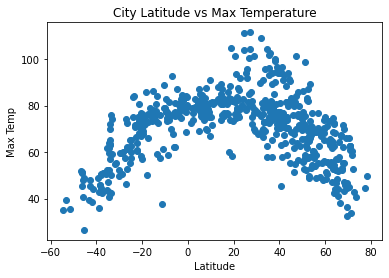

In [74]:
lat = clean_city_data['lat']
max_temp = clean_city_data['max_temp']

plt.scatter(lat, max_temp, marker='o')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('City Latitude vs Max Temperature')

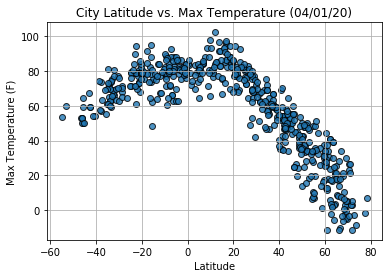

## Latitude vs. Humidity Plot

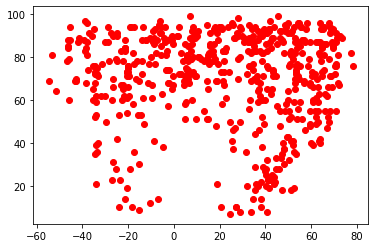

In [75]:
humidity = clean_city_data['humidity']

plt.scatter(lat, humidity, color='r')

## Latitude vs. Cloudiness Plot

ValueError: x and y must be the same size

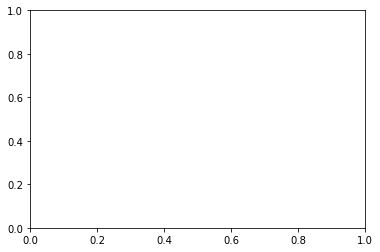

In [78]:


plt.scatter(lat, cloudiness)

## Latitude vs. Wind Speed Plot

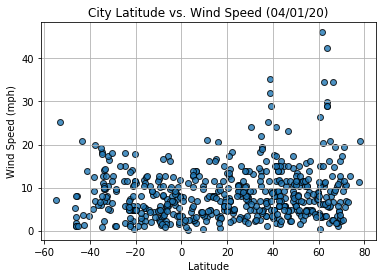

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


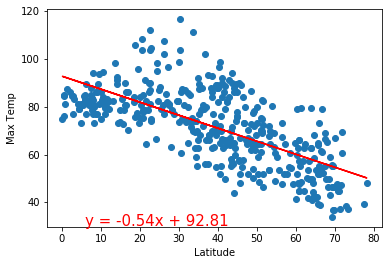

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


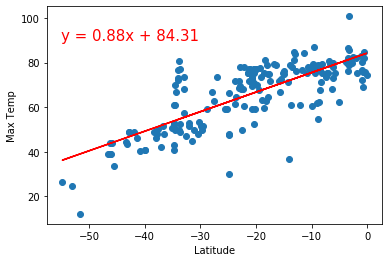

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


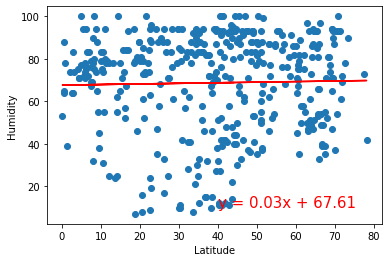

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


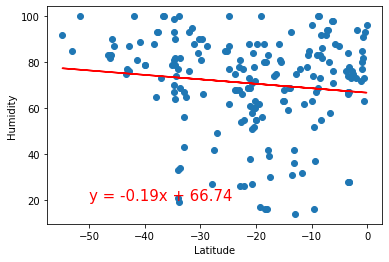

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


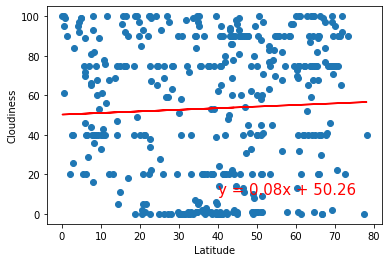

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


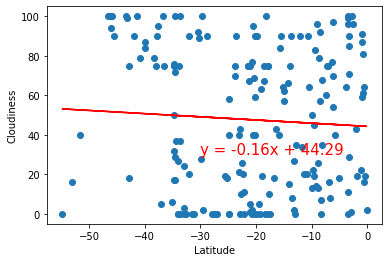

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


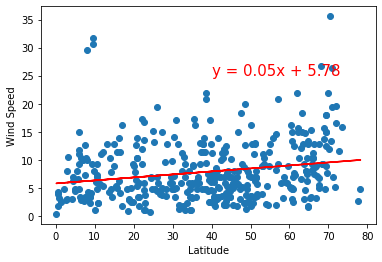

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


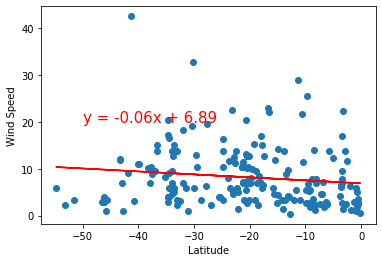